### Import the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
movies = pd.read_csv(
    'ml-10M100K/movies.dat', 
    sep = '::', 
    header = None, 
    engine = 'python', 
    encoding = 'latin-1'
)

movies = movies.rename(columns={0: 'movie_id', 1: 'movie_title', 2: 'genre'})

movies

,movie_id,movie_title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [3]:
tags = pd.read_csv(
    'ml-10M100K/tags.dat',
    sep = '::', 
    header = None, 
    engine = 'python', 
    encoding = 'latin-1'
)

tags = tags.rename(columns={0:'user_id', 1:'movie_id',2: 'tag', 3:'timestamp'})

tags

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835
...,...,...,...,...
95575,71556,1377,Gothic,1188263571
95576,71556,2424,chick flick,1188263606
95577,71556,3033,comedy,1188263626
95578,71556,3081,Gothic,1188263565


In [4]:
ratings = pd.read_csv(
    'ml-10M100K/ratings.dat',
    sep = '::', 
    header = None, 
    engine = 'python', 
    encoding = 'latin-1'
)

ratings = ratings.rename(columns={0:'user_id', 1:'movie_id',2: 'rating', 3:'timestamp'})

ratings


,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


In [5]:
from math import floor
testsize = floor(ratings.shape[0]* 0.3)
trainsize = ratings.shape[0] - testsize
ratings_train = ratings.iloc[:trainsize]
ratings_test = ratings.iloc[trainsize:trainsize+testsize] 

In [6]:
ratings_train.shape

(7000038, 4)

In [7]:
ratings_test.shape

(3000016, 4)

### How many unique users?

In [8]:
n_users = ratings.user_id.unique().shape[0]
n_users

69878

### How many unique items / movies?

In [9]:
n_items = ratings.movie_id.unique().shape[0]
n_items

10677

#### Preprocessing before filtering: (Some movies are not rated. Items & User-movies-data shape does not match)

In [21]:
len(items['movie_id'].unique())

10681

In [22]:
len(movies['movie_id'].unique())

10681

In [23]:
len(ratings['movie_id'].unique())

10677

In [24]:
#drop rows consisting of movies that are not in ratings dataframe

In [25]:
items.drop(items[(~items.movie_id.isin(ratings.movie_id))].index, inplace=True)

In [26]:
len(items['movie_id'].unique())

10677

In [27]:
movies.drop(movies[(~movies.movie_id.isin(ratings.movie_id))].index, inplace=True)

In [34]:
len(movies['movie_id'].unique())

10677

# 1. Content Filtering

### Items matrix (movie-tag)

In [35]:
items= pd.merge(movies, tags[['movie_id','tag']], how='left').fillna("")
items=items.rename(columns={'tag':'metadata'})
items

,movie_id,movie_title,genre,metadata
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar
...,...,...,...,...
98625,65091,Manhattan Melodrama (1934),Crime|Drama|Romance,
98626,65126,Choke (2008),Comedy|Drama,Chuck Palahniuk
98627,65126,Choke (2008),Comedy|Drama,based on book
98628,65130,Revolutionary Road (2008),Drama|Romance,toplist08


In [36]:
items.drop_duplicates(inplace=True)

In [37]:
items=pd.DataFrame(items.groupby(['movie_id','movie_title','genre'])['metadata'].apply(lambda x: '|'.join(x))).reset_index()

In [38]:
items.head()

,movie_id,movie_title,genre,metadata
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar|animation|animated|fun|toy|toys|pixar|ra...
1,2,Jumanji (1995),Adventure|Children|Fantasy,For children|game|animals|Joe Johnston|Robin W...
2,3,Grumpier Old Men (1995),Comedy|Romance,Funniest Movies|comedinha de velhinhos engraÃ...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,girl movie
4,5,Father of the Bride Part II (1995),Comedy,steve martin|pregnancy|remake|family|wedding|F...


## TF-IDF Vectorizer on Metadata

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(items['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=items.index.tolist())
print(tfidf_df.shape)

(10677, 11645)


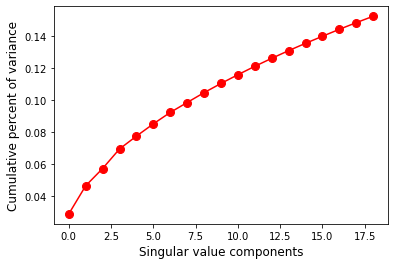

In [40]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=19)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [41]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=items.movie_title.tolist())

In [42]:
latent_matrix_1_df.shape

(10677, 19)

## 2. Collaborative Filtering
- Use user_movies_data

### Create a User-Item Matrix

In [43]:
from scipy.sparse import csr_matrix

In [44]:
user_movies_data = ratings.pivot(index = 'movie_id', columns = 'user_id', values = 'rating').fillna(0)

In [45]:
user_movies_data

user_id,1,2,3,4,5,6,7,8,9,10,...,71558,71559,71560,71561,71562,71563,71564,71565,71566,71567
movie_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Applying SVD

In [46]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(user_movies_data)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index=items.movie_title.tolist())

In [47]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),426.098816,103.057455,21.721243,22.051011,60.936197,139.829038,50.734133,156.835663,38.604463,-8.249967,...,-1.987938,12.335137,2.548602,-4.458909,1.412476,1.664095,0.846413,4.536442,0.891232,-2.295227
Jumanji (1995),186.206177,111.408474,40.998105,-51.064070,-15.919988,13.807390,-46.014242,26.325069,29.649683,-0.086340,...,-11.484328,14.811117,-11.781499,-6.090664,5.037988,-6.085971,11.001144,14.613641,3.760160,17.301743
Grumpier Old Men (1995),92.120014,56.522830,-4.522582,-54.316276,-11.858994,19.393794,48.730372,99.306843,-20.799148,-38.840862,...,2.634177,-10.397879,-5.482767,-2.710250,-3.969732,1.214876,-8.487067,2.662288,-1.413772,-1.402160
Waiting to Exhale (1995),24.067722,21.337536,-13.664905,-12.179292,-20.020522,3.509159,7.587830,7.214212,2.842082,-0.135013,...,-0.277144,-0.533444,2.647648,1.149003,1.437108,2.667956,1.014690,-0.473189,3.649165,0.538866
Father of the Bride Part II (1995),77.389657,64.418930,-4.111773,-47.081043,-27.131018,27.310302,36.691348,90.729107,-11.861538,-24.423204,...,0.698481,-15.329005,8.333424,-1.287850,-10.176353,1.858453,-3.371479,5.506005,-0.008346,2.860893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bedtime Stories (2008),0.278366,-0.146510,0.047070,-0.183374,-0.267653,-0.026613,-0.179428,0.082506,-0.080881,-0.180708,...,0.099802,0.114427,-0.007118,-0.022098,-0.027033,0.053804,0.041455,0.071560,0.184604,0.073092
Manhattan Melodrama (1934),0.219460,-0.160998,-0.096273,-0.263452,-0.382908,-0.318509,-0.245485,0.138802,-0.186298,0.114441,...,-0.016835,0.008061,0.026586,0.082033,-0.157055,-0.032566,-0.070349,-0.029680,0.042213,-0.126200
Choke (2008),0.085736,-0.044377,0.050911,-0.027151,-0.031173,-0.074308,-0.000137,0.008492,-0.005828,-0.149633,...,-0.006004,-0.032902,-0.007629,0.029795,-0.024723,0.028770,-0.005045,-0.006871,0.023697,0.017609
Revolutionary Road (2008),0.060865,-0.026937,0.012102,0.017529,-0.061776,0.004857,-0.037936,0.023282,-0.055381,-0.002037,...,0.014769,0.039203,-0.016190,-0.009601,-0.028280,-0.007435,-0.008636,0.011659,0.030187,-0.048418


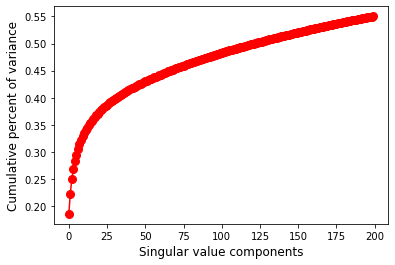

In [48]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()


#### Similarity

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
# dictDf = {'collaborative': score_2} 
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Piranha II: The Spawning (1981),0.877051,0.142000,0.509526
Funny Farm (1988),0.874353,0.223507,0.548930
Jeepers Creepers (2001),0.864860,0.215716,0.540288
"Nightmare Before Christmas, The (1993)",0.860524,0.441778,0.651151
Memento (2000),0.858679,0.390906,0.624793
Hero (1992),0.857946,0.302292,0.580119
"Deep End, The (2001)",0.857946,0.165884,0.511915
Chicken Little (2005),0.857825,0.238565,0.548195
"Fast, Cheap & Out of Control (1997)",0.843548,0.207872,0.525710
Empire Records (1995),0.841933,0.305167,0.573550


In [50]:
similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),0.461845,0.589869,0.525857
Independence Day (a.k.a. ID4) (1996),0.467335,0.575024,0.521180
Mission: Impossible (1996),0.536235,0.570019,0.553127
Toy Story 2 (1999),0.824681,0.567191,0.695936
Star Wars: Episode VI - Return of the Jedi (1983),0.414803,0.557154,0.485978
Twister (1996),0.371838,0.557031,0.464434
James and the Giant Peach (1996),0.327085,0.551974,0.439530
"Nutty Professor, The (1996)",0.477946,0.550550,0.514248
Space Jam (1996),0.762280,0.544735,0.653508
Willy Wonka & the Chocolate Factory (1971),0.469496,0.544220,0.506858


In [51]:
similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Toy Story 2 (1999),0.824681,0.567191,0.695936
"Bug's Life, A (1998)",0.817660,0.531372,0.674516
Space Jam (1996),0.762280,0.544735,0.653508
"Nightmare Before Christmas, The (1993)",0.860524,0.441778,0.651151
Pulp Fiction (1994),0.792508,0.501946,0.647227
Ferris Bueller's Day Off (1986),0.827429,0.466210,0.646820
Finding Nemo (2003),0.812642,0.476842,0.644742
There's Something About Mary (1998),0.818055,0.463655,0.640855
12 Monkeys (Twelve Monkeys) (1995),0.748241,0.520065,0.634153
Memento (2000),0.858679,0.390906,0.624793


## 3. Hybrid Recommendation System

In [52]:
def recommend_similar_movies(title):
    # take the latent vectors for a selected movie from both content 
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative 
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies 
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(11))

In [53]:
recommend_similar_movies("Toy Story (1995)")

                                         content  collaborative    hybrid
Toy Story 2 (1999)                      0.824681       0.567191  0.695936
Bug's Life, A (1998)                    0.817660       0.531372  0.674516
Space Jam (1996)                        0.762280       0.544735  0.653508
Nightmare Before Christmas, The (1993)  0.860524       0.441778  0.651151
Pulp Fiction (1994)                     0.792508       0.501946  0.647227
Ferris Bueller's Day Off (1986)         0.827429       0.466210  0.646820
Finding Nemo (2003)                     0.812642       0.476842  0.644742
There's Something About Mary (1998)     0.818055       0.463655  0.640855
12 Monkeys (Twelve Monkeys) (1995)      0.748241       0.520065  0.634153
Memento (2000)                          0.858679       0.390906  0.624793
Back to the Future (1985)               0.706650       0.541875  0.624262


In [54]:
recommend_similar_movies("GoldenEye (1995)")

                                    content  collaborative    hybrid
Stargate (1994)                    0.885144       0.651913  0.768528
Die Hard: With a Vengeance (1995)  0.825338       0.702006  0.763672
Waterworld (1995)                  0.757515       0.729922  0.743718
Outbreak (1995)                    0.847694       0.636676  0.742185
Net, The (1995)                    0.852621       0.631746  0.742184
Speed (1994)                       0.807656       0.616474  0.712065
True Lies (1994)                   0.738365       0.678545  0.708455
Mrs. Doubtfire (1993)              0.883032       0.531979  0.707506
Broken Arrow (1996)                0.827049       0.570118  0.698583
Pretty Woman (1990)                0.869755       0.522609  0.696182
Get Shorty (1995)                  0.879869       0.510506  0.695188


In [55]:
recommend_similar_movies("Mission: Impossible (1996)")

                                       content  collaborative    hybrid
Eraser (1996)                         0.761028       0.723683  0.742355
Star Trek: First Contact (1996)       0.920835       0.562945  0.741890
Independence Day (a.k.a. ID4) (1996)  0.722052       0.728664  0.725358
Jurassic Park (1993)                  0.887407       0.559876  0.723641
Broken Arrow (1996)                   0.726932       0.692153  0.709542
Jumanji (1995)                        0.907003       0.479199  0.693101
River Wild, The (1994)                0.731164       0.638064  0.684614
Dragonheart (1996)                    0.717054       0.651640  0.684347
Dead Man Walking (1995)               0.962885       0.403344  0.683114
Minority Report (2002)                0.906322       0.456528  0.681425
Men in Black (1997)                   0.800839       0.553835  0.677337


### Saving files for turicreate in Colab

movies.to_csv('results/movies.csv')
items.to_csv('results/items.csv')
ratings.to_csv('results/ratings.csv')
tags.to_csv('results/tags.csv')
ratings_train.to_csv('results/ratings_train.csv')
ratings_test.to_csv('results/ratings_test.csv')
user_movies_data.to_csv('results/user_movies_data.csv')

## 4. Popularity filter

In [83]:
new_data=items.copy()

In [103]:
new_data['Aggregate_rating']=pd.DataFrame(ratings[(ratings.movie_id.isin(new_data.movie_id))].groupby('movie_id')['rating'].mean()).reset_index()['rating']

In [110]:
new_data['num_reviews']=pd.DataFrame(ratings[(ratings.movie_id.isin(new_data.movie_id))].groupby('movie_id')['rating'].count()).reset_index()['rating']

In [111]:
new_data

,movie_id,movie_title,genre,metadata,Aggregate_rating,num_reviews
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar|animation|animated|fun|toy|toys|pixar|ra...,3.928769,26449
1,2,Jumanji (1995),Adventure|Children|Fantasy,For children|game|animals|Joe Johnston|Robin W...,3.208070,12032
2,3,Grumpier Old Men (1995),Comedy|Romance,Funniest Movies|comedinha de velhinhos engraÃ...,3.150385,7790
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,girl movie,2.860544,1764
4,5,Father of the Bride Part II (1995),Comedy,steve martin|pregnancy|remake|family|wedding|F...,3.077435,7135
...,...,...,...,...,...,...
10672,65088,Bedtime Stories (2008),Adventure|Children|Comedy,,3.062500,8
10673,65091,Manhattan Melodrama (1934),Crime|Drama|Romance,,3.666667,3
10674,65126,Choke (2008),Comedy|Drama,Chuck Palahniuk|based on book,3.666667,3
10675,65130,Revolutionary Road (2008),Drama|Romance,toplist08,2.250000,2


In [112]:
movie_list=['Toy Story (1995)','Jumanji (1995)','Grumpier Old Men (1995)','Waiting to Exhale (1995)']
movie_info = new_data[(new_data.movie_title == movie_list[0])|(new_data.movie_title == movie_list[1])|
                   (new_data.movie_title == movie_list[2])|(new_data.movie_title == movie_list[3])]
pop_data=movie_info[['movie_id','movie_title','genre','metadata', 'Aggregate_rating']]
C = pop_data['Aggregate_rating'].mean()

In [113]:
print(C)

3.2869420116397396


In [115]:
m = new_data['num_reviews'].quantile(0.90)
print(m)

2388.0


In [117]:
pop_movies=new_data.copy().loc[new_data['num_reviews'] >= m]
pop_movies

,movie_id,movie_title,genre,metadata,Aggregate_rating,num_reviews
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar|animation|animated|fun|toy|toys|pixar|ra...,3.928769,26449
1,2,Jumanji (1995),Adventure|Children|Fantasy,For children|game|animals|Joe Johnston|Robin W...,3.208070,12032
2,3,Grumpier Old Men (1995),Comedy|Romance,Funniest Movies|comedinha de velhinhos engraÃ...,3.150385,7790
4,5,Father of the Bride Part II (1995),Comedy,steve martin|pregnancy|remake|family|wedding|F...,3.077435,7135
5,6,Heat (1995),Action|Crime|Thriller,Can't remember|setting:LA|who cares DVDs|overr...,3.813011,13696
...,...,...,...,...,...,...
9819,51662,300 (2007),Action|Fantasy|War,Nudity (Topless)|Graphic Novel|fascistic|dani2...,3.715409,2797
9960,54286,"Bourne Ultimatum, The (2007)",Action|Adventure|Mystery|Thriller,based on a book|imdb top 250|Robert Ludlum|ass...,3.970733,2648
10069,55820,No Country for Old Men (2007),Crime|Drama|Thriller,imdb top 250|dani2007|ambiguous ending|cinemat...,4.020116,2411
10107,56367,Juno (2007),Drama|Romance,imdb top 250|Do zassania|overrated|toplist07|p...,4.000000,2482


In [118]:
def weighted_rating(data, m=m, C=C):
    v = data['num_reviews']
    R = data['Aggregate_rating']
    # Calculating the score
    return (v/(v+m) * R) + (m/(m+v) * C)

In [119]:
pop_movies['score'] = pop_movies.apply(weighted_rating, axis=1)

In [120]:
pop_movies

,movie_id,movie_title,genre,metadata,Aggregate_rating,num_reviews,score
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Pixar|animation|animated|fun|toy|toys|pixar|ra...,3.928769,26449,3.875619
1,2,Jumanji (1995),Adventure|Children|Fantasy,For children|game|animals|Joe Johnston|Robin W...,3.208070,12032,3.221132
2,3,Grumpier Old Men (1995),Comedy|Romance,Funniest Movies|comedinha de velhinhos engraÃ...,3.150385,7790,3.182425
4,5,Father of the Bride Part II (1995),Comedy,steve martin|pregnancy|remake|family|wedding|F...,3.077435,7135,3.129971
5,6,Heat (1995),Action|Crime|Thriller,Can't remember|setting:LA|who cares DVDs|overr...,3.813011,13696,3.734905
...,...,...,...,...,...,...,...
9819,51662,300 (2007),Action|Fantasy|War,Nudity (Topless)|Graphic Novel|fascistic|dani2...,3.715409,2797,3.518075
9960,54286,"Bourne Ultimatum, The (2007)",Action|Adventure|Mystery|Thriller,based on a book|imdb top 250|Robert Ludlum|ass...,3.970733,2648,3.646489
10069,55820,No Country for Old Men (2007),Crime|Drama|Thriller,imdb top 250|dani2007|ambiguous ending|cinemat...,4.020116,2411,3.655286
10107,56367,Juno (2007),Drama|Romance,imdb top 250|Do zassania|overrated|toplist07|p...,4.000000,2482,3.650353


In [121]:
pop_movies = pop_movies.sort_values('score', ascending=False)

### Top 10 rated movies

In [122]:
pop_movies[['movie_title','genre','metadata', 'Aggregate_rating', 'num_reviews', 'score']].head(10)

,movie_title,genre,metadata,Aggregate_rating,num_reviews,score
315,"Shawshank Redemption, The (1994)",Drama,based on a short story|directorial debut|Frank...,4.457238,31126,4.373850
843,"Godfather, The (1972)",Crime|Drama,Oscar (Best Picture)|Marlon Brando|classic|dvd...,4.415085,19814,4.293745
523,Schindler's List (1993),Drama|War,Speilberg|drama|Holocaust|Steven Spielberg|tru...,4.363483,25777,4.272207
49,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,Kevin Spacey|ensemble cast|complicated|must be...,4.367142,24037,4.269526
1173,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,Egypt|Lucas|seen more than once|DVD Collection...,4.261317,21803,4.165132
895,Casablanca (1942),Drama|Romance,black and white|classic|can't remember|Drama|h...,4.319741,12507,4.154160
1169,One Flew Over the Cuckoo's Nest (1975),Comedy|Drama,based on a book|AFI 100|Jack Nicholson|mental ...,4.292380,14435,4.149659
1195,"Godfather: Part II, The (1974)",Crime|Drama,cinematographer:Gordon Willis|classical|guns|D...,4.303215,13281,4.148332
257,Star Wars: Episode IV - A New Hope (a.k.a. Sta...,Action|Adventure|Sci-Fi,desert|quotable|Lucas|Gfei own it|seen more th...,4.220209,28566,4.148211
587,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,based on a book|Anthony Hopkins|Demme|psycholo...,4.204200,33668,4.143450
